In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re

In [3]:
data_dir = '../metdata'

In [4]:
files = os.listdir(data_dir)
files = [os.path.join(data_dir,x) for x in files]
files

['../metdata/40.75N_286.01E.csv',
 '../metdata/51.5N_359.9E.csv',
 '../metdata/59.92N_10.75E.csv',
 '../metdata/43.28N_5.39E.csv',
 '../metdata/17.36N_78.5E.csv',
 '../metdata/41.9N_12.46E.csv',
 '../metdata/58.76N_265.83E.csv',
 '../metdata/51.03N_245.94E.csv',
 '../metdata/-33.5N_151E.csv',
 '../metdata/43.64N_280.63E.csv',
 '../metdata/-33.9N_18.5E.csv',
 '../metdata/18N_283.2E.csv']

In [5]:
pattern = r"([-]?\d+[\.]?\d+)N_([-]?\d+[\.]?\d+)E\.csv"
parsed_latlon = []
for file in files:
    match = re.search(pattern, file)
    if match:
        latitude = match.group(1)
        longitude = match.group(2)
    parsed_latlon.append((float(latitude), float(longitude)))
lat, lon = zip(*parsed_latlon)
parsed_latlon

[(40.75, 286.01),
 (51.5, 359.9),
 (59.92, 10.75),
 (43.28, 5.39),
 (17.36, 78.5),
 (41.9, 12.46),
 (58.76, 265.83),
 (51.03, 245.94),
 (-33.5, 151.0),
 (43.64, 280.63),
 (-33.9, 18.5),
 (18.0, 283.2)]

In [6]:
kelvin_to_cels = -273.15

def readfile(path, index):
    df = pd.read_csv(path)
    headings = ["year", "month", "day", "hour", "temperature(celsius)", "precipitation", "u-wind", "v-wind"]
    df.columns = headings
    df["temperature(celsius)"] = df["temperature(celsius)"] + kelvin_to_cels
    df["longitude"] = lon[index]
    df["latitude"] = lat[index]
    return df
df = readfile(files[0], 0)
df

,year,month,day,hour,temperature(celsius),precipitation,u-wind,v-wind,longitude,latitude
0,1980,1,1,1,-2.00,0.000000e+00,1.72010,-1.6487,286.01,40.75
1,1980,1,1,2,-3.08,0.000000e+00,1.72320,-1.3887,286.01,40.75
2,1980,1,1,3,-3.60,0.000000e+00,1.74940,-1.3237,286.01,40.75
3,1980,1,1,4,-3.40,0.000000e+00,1.78490,-1.5519,286.01,40.75
4,1980,1,1,5,-4.11,0.000000e+00,1.76480,-1.8720,286.01,40.75
...,...,...,...,...,...,...,...,...,...,...
341874,2018,12,31,19,3.10,8.887000e-07,0.27815,3.0868,286.01,40.75
341875,2018,12,31,20,3.45,3.548400e-05,-0.27715,3.2876,286.01,40.75
341876,2018,12,31,21,3.26,1.339300e-04,-0.70951,3.6037,286.01,40.75
341877,2018,12,31,22,2.38,2.838000e-04,-1.23100,2.8776,286.01,40.75


In [7]:
def join_datasets(files):
    dfs = []
    for i, file in enumerate(files):
        df = readfile(file, i)
        dfs.append(df)
    dfs = pd.concat(dfs, axis = 0)
    dfs.reset_index(drop=True, inplace=True)
    return dfs

dfs = join_datasets(files)
dfs.head

<bound method NDFrame.head of          year  month  day  hour  temperature(celsius)  precipitation  u-wind  \
0        1980      1    1     1                 -2.00   0.000000e+00  1.7201   
1        1980      1    1     2                 -3.08   0.000000e+00  1.7232   
2        1980      1    1     3                 -3.60   0.000000e+00  1.7494   
3        1980      1    1     4                 -3.40   0.000000e+00  1.7849   
4        1980      1    1     5                 -4.11   0.000000e+00  1.7648   
...       ...    ...  ...   ...                   ...            ...     ...   
4102543  2018     12   31    19                 26.56   4.681900e-16 -9.2599   
4102544  2018     12   31    20                 26.69   1.755900e-16 -9.2270   
4102545  2018     12   31    21                 26.86   1.154500e-10 -9.1698   
4102546  2018     12   31    22                 27.12   2.926000e-16 -9.3076   
4102547  2018     12   31    23                 27.24   8.776300e-17 -9.0002   

         

In [20]:
# IN PROCESS OF MAKING THIS YEAR SPECIFIC
def plot_mean(var, year, lon, lat):
    plt.figure(figsize=(8, 8))
    data = dfs[dfs["longitude"]==lon]
    data = data[data["year"] == year]
    for i, file in enumerate(files):
        temps = data.groupby("month")[var].mean()
        label = file.replace(data_dir, "").replace(".csv", "").replace("/", "").replace("_", ", ")
        plt.plot(temps.index, temps.values)
    plt.title(f'Average {var.capitalize()} Change in {year} at ({lon},{lat})')
    plt.xlabel('Month')
    plt.ylabel(f'Average {var.capitalize()}')
    plt.legend(bbox_to_anchor=(1, 1), ncol=1, fancybox=True, shadow=True)
    plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


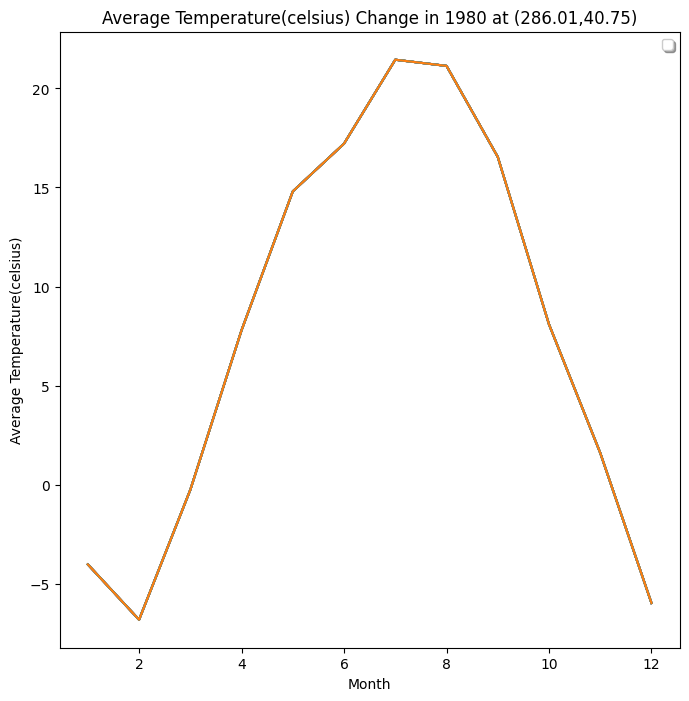

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


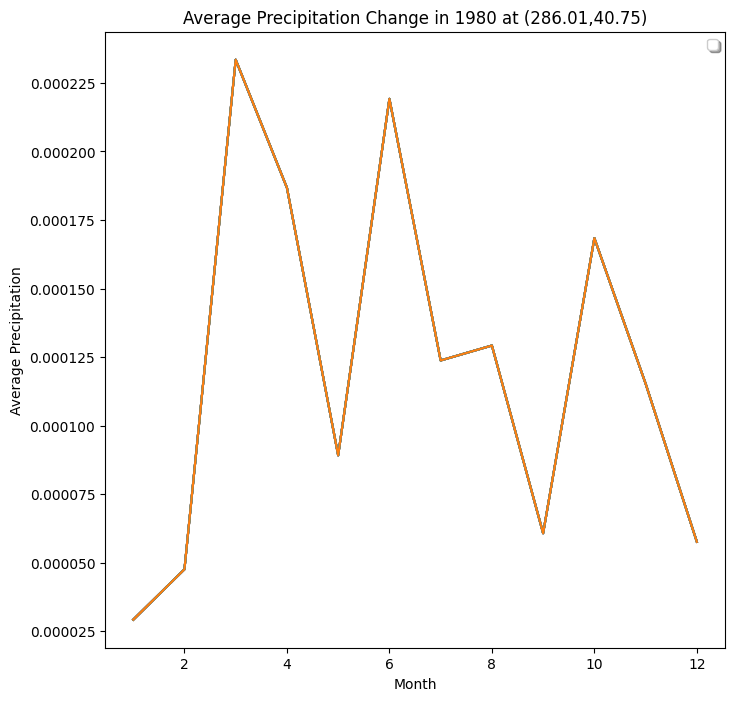

In [21]:
plot_mean("temperature(celsius)", 1980, 286.01, 40.75)
plot_mean("precipitation", 1980, 286.01, 40.75)

In [8]:
import plotly.graph_objects as go

In [ ]:
subset = dfs.sample(10000)

In [50]:


fig = go.Figure(data=[go.Scatter3d(
    x=subset['latitude'],
    y=subset['longitude'],
    z=subset['temperature(°C)'],
    mode='markers',
    marker=dict(
        size=5,
        color=subset['temperature(°C)'],  # set color to temperature
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8
    )
)])

# Set plot titles and labels
fig.update_layout(title='Temperature Distribution by Latitude and Longitude',
                  scene=dict(
                      xaxis_title='Latitude',
                      yaxis_title='Longitude',
                      zaxis_title='Temperature(°C)'
                  ))

# Show the plot
fig.show()

KeyError: 'temperature(°C)'

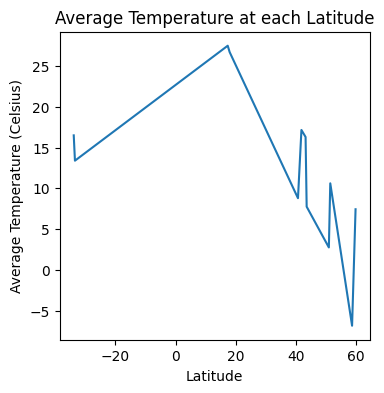

In [51]:
plt.figure(figsize=(4,4))
temps = subset.groupby("latitude")["temperature(celsius)"].mean()
temps.plot(kind='line')
plt.title(f'Average Temperature at each Latitude')
plt.xlabel('Latitude')
plt.ylabel(f'Average Temperature (Celsius)')
plt.show()

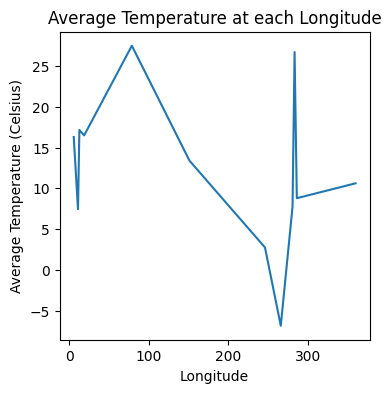

In [52]:
plt.figure(figsize=(4,4))
temps = subset.groupby("longitude")["temperature(celsius)"].mean()
temps.plot(kind='line')
plt.title(f'Average Temperature at each Longitude')
plt.xlabel('Longitude')
plt.ylabel(f'Average Temperature (Celsius)')
plt.show()

In [41]:
import seaborn as sns

/home/gfa789/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/gfa789/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/gfa789/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



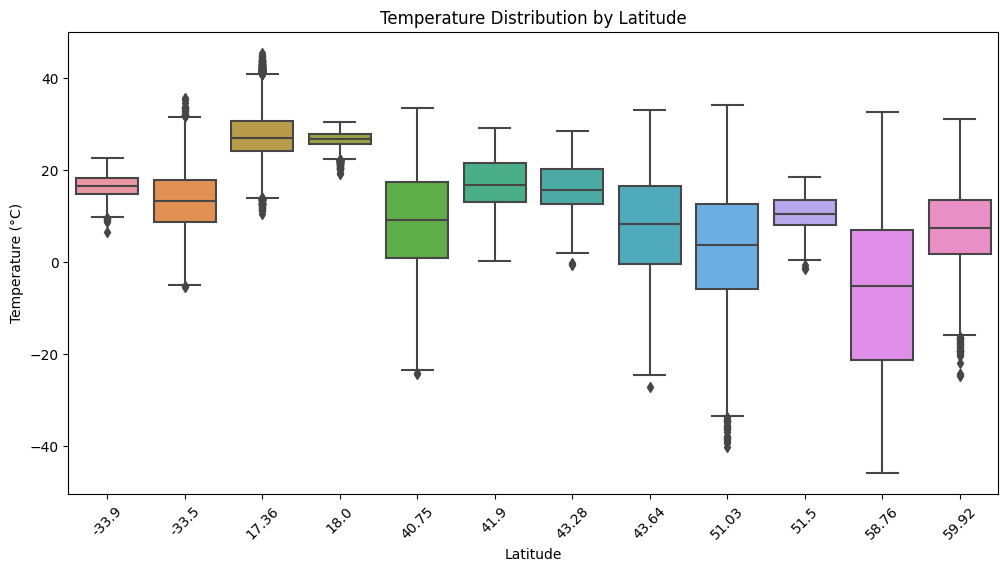

In [54]:
# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='latitude', y='temperature(celsius)', data=subset)

plt.xticks(rotation=45)
plt.title('Temperature Distribution by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
# plt.tight_layout()
plt.show()

/home/gfa789/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/gfa789/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/gfa789/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



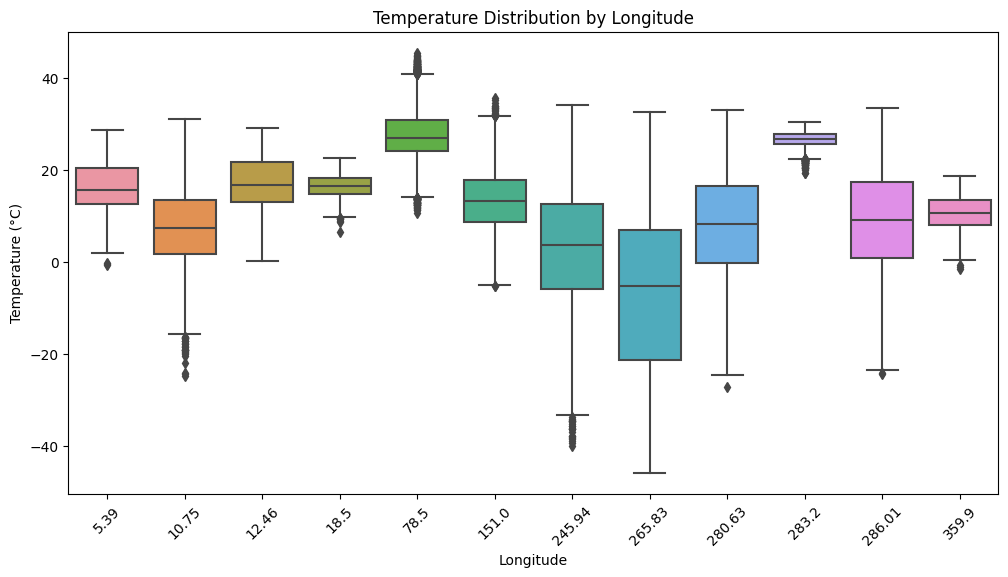

In [53]:
# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='longitude', y='temperature(celsius)', data=subset)

plt.xticks(rotation=45)
plt.title('Temperature Distribution by Longitude')
plt.xlabel('Longitude')
plt.ylabel('Temperature (°C)')
# plt.tight_layout()
plt.show()

359.9


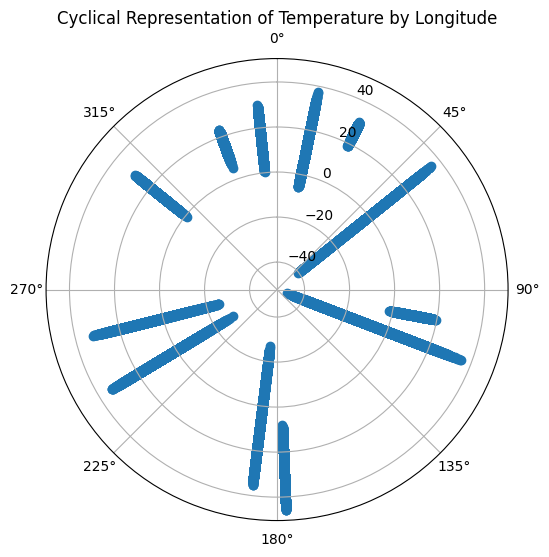

In [63]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)

print(np.max(subset["longitude"]))
ax.scatter(subset["longitude"], subset["temperature(celsius)"])

ax.set_theta_direction(-1)

ax.set_thetamin(0)  # Optionally set the limits for the plot
ax.set_thetamax(360)
ax.set_theta_zero_location('N')  # 'N' for north

plt.title('Cyclical Representation of Temperature by Longitude')
plt.show()

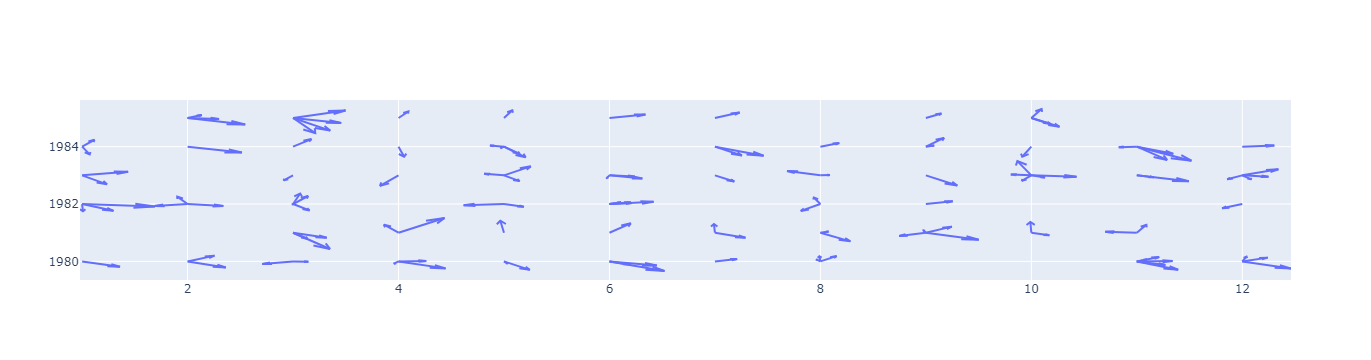

In [89]:
import plotly.figure_factory as ff

# x,y = np.meshgrid(np.arange(0, 2, .2), np.arange(0, 2, .2))
# u = np.cos(x)*y
# v = np.sin(x)*y
subset = dfs.sample(10000)
data = subset[subset["latitude"] == parsed_latlon[0][0]]
data = data[data["year"]<1986]

x = data["month"]
y = data["year"]
u = data["u-wind"]
v = data["v-wind"]

fig = ff.create_quiver(x, y, u, v)
fig.show()